## Chapter 4: Regression And Prediction: Simple Linear Regression- Page 224
    Contains Functions:
       Linear Regression

In [106]:
# import modules
import math
import pylab
import random
import statistics
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

### Linear Regression
    ![Model Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/968be557dd22b1a2e536b8d22369cfdb37f58703)

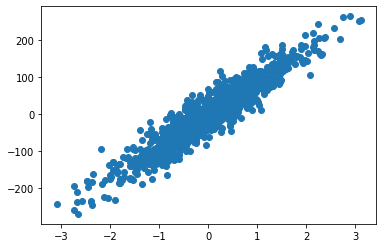

In [107]:
def create_linear_data(n_samples=1000,n=30):   
    # Get regression data from scikit-learn
    x, y = datasets.make_regression(n_samples=n_samples, n_features=1, noise=n)
    return x,y

x,y = create_linear_data()
# Vizualize the data
plt.scatter(x,y)
plt.show()

#### Beta
    ![Beta](https://wikimedia.org/api/rest_v1/media/math/render/svg/944e96221f03e99dbd57290c328b205b0f04c803)

In [108]:
def beta(x,y):
    '''
        Compute beta
    '''
    n = len(x)
    x_b = x.mean()
    y_b = y.mean()
    nume = 0  #numerator of the formula
    denom = 0 #denominator of the formula
    for i in range(0,n):
        nume += (x[i]-x_b)*(y[i]-y_b)  #summation of numerator
        denom += (x[i]-x_b)**2 #summation of denominator
        
    beta = nume/denom  #divide
    return beta[0]

b = beta(x,y)
print(f'beta: {b}')    

beta: 85.64451846161673


#### Alpha


In [109]:
def alpha(x,y,b):
    '''
        Compute alpha
    '''
    y_b = y.mean()
    x_b = x.mean()
    return y_b-(b*x_b)

a = alpha(x,y,b)
print(f'alpha: {a}')

alpha: -0.1666391035083622


### Fit the Line using linear regression formula

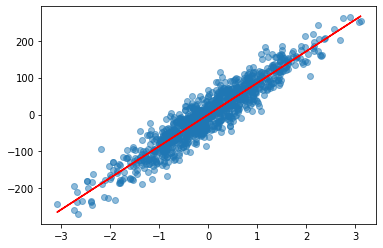

In [110]:
def fit_line(x,y,a,b,e=[]):
    y_p = []
    for i in range(0,len(x)):
        if len(e) == 0:
            y_i = a+(b*x[i])
        else:
            y_i = a+(b*x[i])+e[i]
        y_p.append(y_i[0])
    
    return x,y_p
    
x,y_p = fit_line(x,y,a,b) #regression line

# Vizualize the regression line
plt.figure()
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_p, color = 'r') #plot the regression line
plt.show()

### Compute error mean

In [111]:
def get_errors(x,y,a,b):
    e = []
    for i in range(0,len(x)):
        e_i = y[i]-a-(b*x[i])
        e.append(e_i[0])
    return e

e = get_errors(x,y_p,a,b)
print(statistics.mean(e))

-1.5543122344752192e-18


### Compute R Squared

In [112]:
def get_rsquared(x,y,y_f):
    #compute total sum of squares
    ss_tot = 0
    y_b = y.mean()
    for i in range(0,len(y)):
        ss_tot+=(y[i]-y_b)**2
    #compute residual sum of squares
    ss_res = 0
    for i in range(0,len(y)):
        ss_res += (y[i]-y_f[i])**2
    
    return 1-(ss_res/ss_tot)

r_squared = get_rsquared(x,y,y_p)
print(f'R Squared: {r_squared}')

R Squared: 0.8863449537208539


### Fit regression line with error residuals

-1.48769885299771e-17


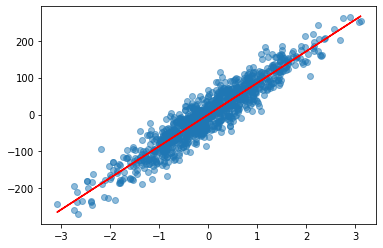

In [113]:
x,y_e = fit_line(x,y_p,a,b,e=e)
e = get_errors(x,y_e,a,b)
print(statistics.mean(e))
# Vizualize the regression line
plt.figure()
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_e, color = 'r') #plot the regression line
plt.show()

### Test Prediction

In [114]:
def predict(x_i,a,b):
    y_i = a+(b*x_i)
    return y_i

rand_idx = random.randint(0, 1000)
x_val = x[rand_idx][0]
pred = predict(x_val,a,b)
print(f'x: {x_val} y: {y[rand_idx]}')
print(f'Predicted Val:{pred}')


x: 0.8918541777282879 y: 60.21832082538903
Predicted Val:76.215782486012


In [115]:
#compare to sklearn result
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.8863449537208541